In [ ]:
! pip install qiskit qiskit_aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=07db5207f02e24aeba45b634b9d48b513bfa0326278c1adad0dc8135d78ea230
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In this jupyter notebook we will investigate how the errors propagate in a quantum chip. We will focus on the case of one qubit. For one qubit, there are two types of error that can happen: amplitude and phase error.

In this notebook we will consider the amplitude error, which is an error that, for example, lets the state $|1>$ become $|0>$.

In the first piece of code, we import the error structure from a real quantum device (IBM Guadalupe, 16 qubits) and let the state rest for a certain time.

The output (counts) of the circuit is provided. Your task is to plot the value of fidelity of the state of the qubit as a function of the number of identity gates the qubit experiences. The fidelity is defined as the scalar product between the quantum state before the computation (which is in this case |1>) and the state after the computation (which we can for this case assume to be a|0> + b|1>, with a and b found from the counts of the measured circuit) SQUARED.

Your function that you will plot will look something like fidelity(n_counts).

In [ ]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
##from qiskit.providers.fake_provider import FakeGuadalupeV2
##from qiskit.providers.aer.noise import NoiseModel
import numpy as np


# Fetch backend and noise model
from qiskit.providers.fake_provider import GenericBackendV2 # Replace with the mock device you'd like to use

# Generate a 5-qubit simulated backend
backend = GenericBackendV2(num_qubits=5) #or backend = GenericBackendV2(num_qubits=5)

# Initialize the quantum circuit
n_qubits = 1
qc = QuantumCircuit(n_qubits, n_qubits)

# Initialize to the |1> state
for i in range(n_qubits):
    qc.x(i)

# Apply identity gates (these won't do anything but are added for structure)
n_repeats = 100
for _ in range(n_repeats):
  for i in range(n_qubits):
      qc.id(i)

# Add measurements
qc.measure(range(n_qubits), range(n_qubits))

# Transpile with optimization level 0 to keep the id gates, usimg the simulator with the noise model from the fake device
transpiled_circuit = transpile(qc, backend, optimization_level=0)

# Run the noisy simulation
job = backend.run(transpiled_circuit)

# Get the measurement results
counts = job.result().get_counts()

# Display the counts
print(counts)

#"""
# fidelity = .... (fill in here)
##"""


{'0': 34, '1': 990}


In [ ]:
transpiled_circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
      q_0 -> 0 ┤ X ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├»
               └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
ancilla_0 -> 1 ────────────────────────────────────────────────────────────»
                                                                           »
ancilla_1 -> 2 ────────────────────────────────────────────────────────────»
                                                                           »
ancilla_2 -> 3 ────────────────────────────────────────────────────────────»
                                                                           »
ancilla_3 -> 4 ────────────────────────────────────────────────────────────»
                                                                           »
          c: 1/════════════════════════════════════════════════════════════»
                                                                           »
«               ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
«      q_0 -> 0 ┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├»
«               └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«ancilla_0 -> 1 ────────────────────────────────────────────────────────────»
«                                                                           »
«ancilla_1 -> 2 ────────────────────────────────────────────────────────────»
«                                                                           »
«ancilla_2 -> 3 ────────────────────────────────────────────────────────────»
«                                                                           »
«ancilla_3 -> 4 ────────────────────────────────────────────────────────────»
«                                                                           »
«          c: 1/════════════════════════════════════════════════════════════»
«                                                                           »
«               ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
«      q_0 -> 0 ┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├»
«               └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«ancilla_0 -> 1 ────────────────────────────────────────────────────────────»
«                                                                           »
«ancilla_1 -> 2 ────────────────────────────────────────────────────────────»
«                                                                           »
«ancilla_2 -> 3 ────────────────────────────────────────────────────────────»
«                                                                           »
«ancilla_3 -> 4 ────────────────────────────────────────────────────────────»
«                                                                           »
«          c: 1/════════════════════════════════════════════════════════════»
«                                                                           »
«               ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
«      q_0 -> 0 ┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├┤ I ├»
«               └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«ancilla_0 -> 1 ────────────────────────────────────────────────────────────»
«                                                                           »
«ancilla_1 -> 2 ────────────────────────────────────────────────────────────»
«                                                                           »
«ancilla_2 -> 3 ────────────────────────────────────────────────────────────»
«                                                                           »
«ancilla_3 -> 4 ────────────────────────────────────────────────────────────»
«                                                                           »
«          c: 1/════════════════════════════════════════════════════════════»
«                                                 

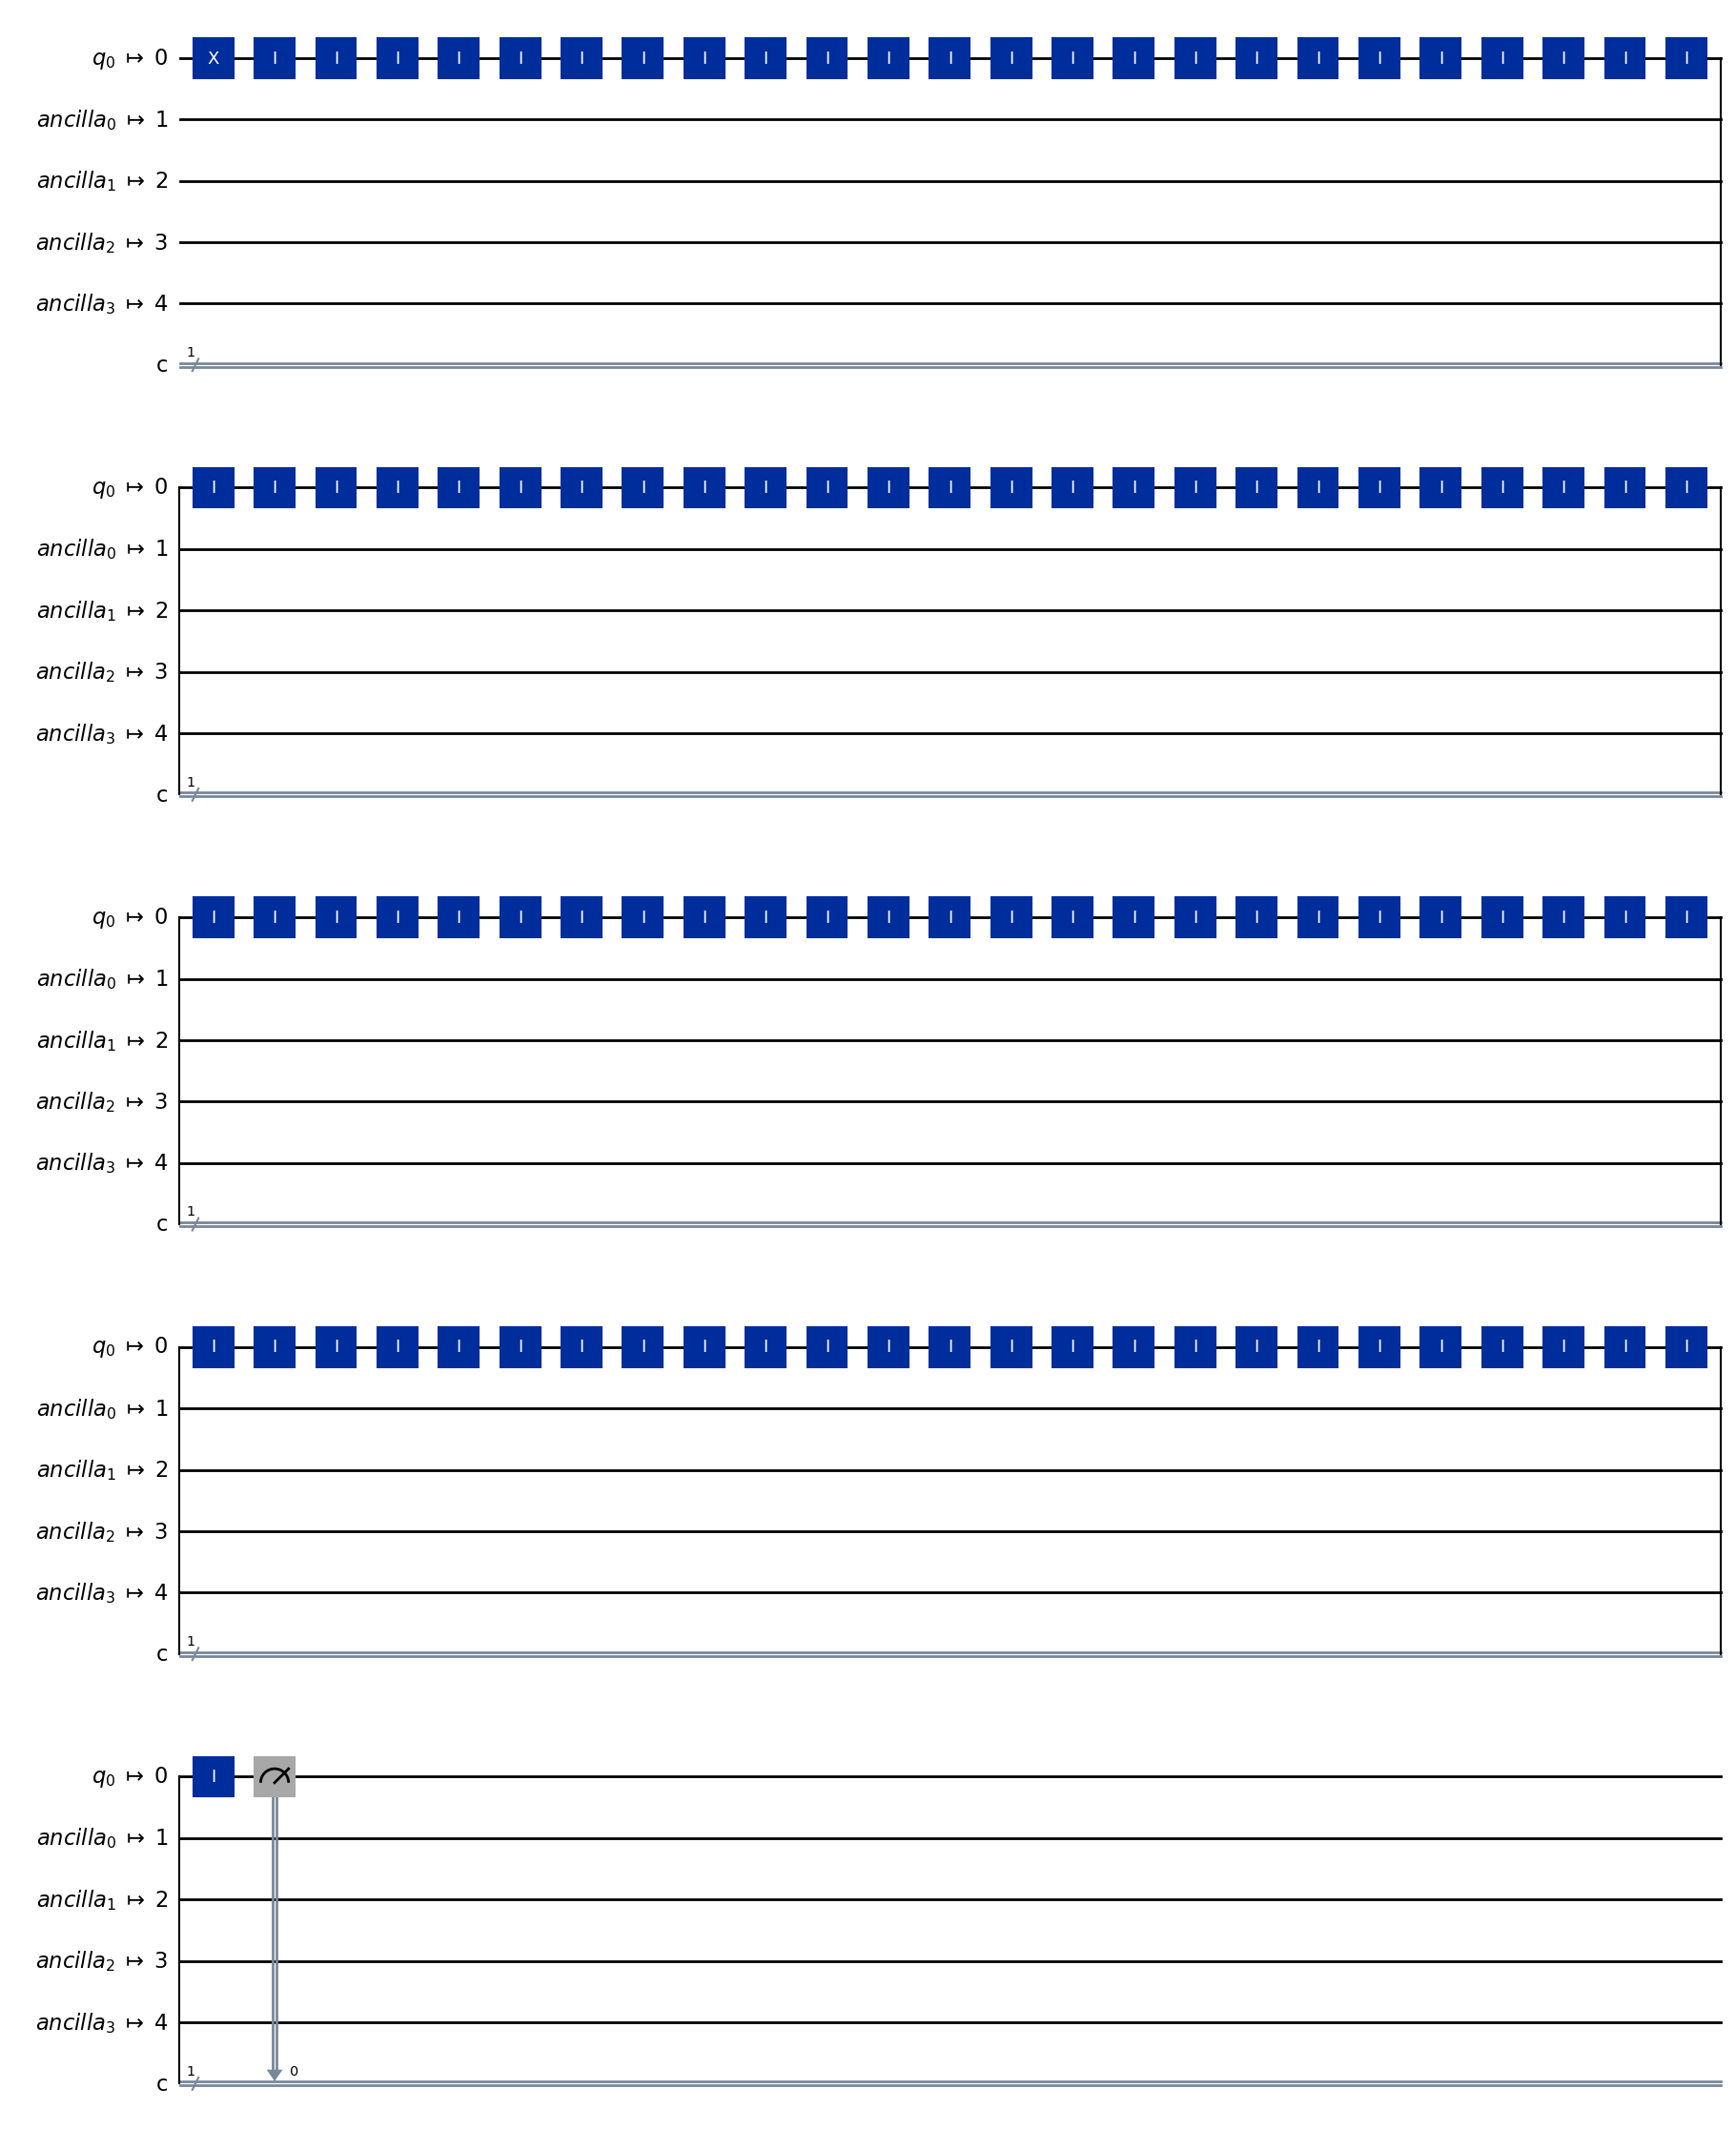

In [ ]:
transpiled_circuit.draw(output='mpl')

In [ ]:
# Total number of shots (simulations)
total_shots = sum(counts.values())

# Number of times the expected state was measured
count_0 = counts.get('0')
count_1 = counts.get('1')  # Get the count of state |1⟩, default to 0 if not present

# Calculate fidelity
fidelity = count_1 / total_shots

print(f"Fidelity: {fidelity:.4f}")

Fidelity: 0.9746


Your task: compute the fidelity of the quantum state, then plot it for different values of n_repeats. You will need to pack the above code into a function of n_repeats, that outputs fidelity.

In [ ]:
def fidelity(n_repeats):
    # Fetch backend and noise model
    from qiskit.providers.fake_provider import GenericBackendV2 # Replace with the mock device you'd like to use

    # Generate a 5-qubit simulated backend
    backend = GenericBackendV2(num_qubits=5)

    # Initialize the quantum circuit
    n_qubits = 1
    qc = QuantumCircuit(n_qubits, n_qubits)

    # Initialize to the |1⟩ state
    for i in range(n_qubits):
        qc.x(i)

    # Apply identity gates `n_repeats` times
    for _ in range(n_repeats):
        for i in range(n_qubits):
            qc.id(i)

    # Add measurements
    qc.measure(range(n_qubits), range(n_qubits))

     # Transpile with optimization level 0 to keep the id gates, usimg the simulator with the noise model from the fake device
    transpiled_circuit = transpile(qc, backend, optimization_level=0)

      # Run the noisy simulation
    job = backend.run(transpiled_circuit)

    # Get the measurement results
    counts = job.result().get_counts()

    # Total number of shots (simulations)
    total_shots = sum(counts.values())

    # Number of times the expected state was measured
    count_0 = counts.get('0')
    count_1 = counts.get('1')  # Get the count of state |1⟩, default to 0 if not present

    # Calculate fidelity
    fidelity = count_1 / total_shots

    return fidelity

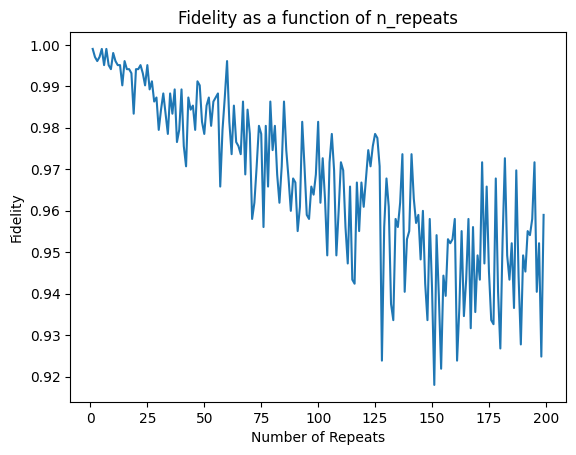

In [ ]:
import matplotlib.pyplot as plt
#"""
#Plotting routine
#"""
# Plotting the fidelity as a function of n_repeats
n_repeats_values = range(1, 200)
fidelities = [fidelity(n) for n in n_repeats_values]

plt.plot(n_repeats_values, fidelities)
plt.xlabel('Number of Repeats')
plt.ylabel('Fidelity')
plt.title('Fidelity as a function of n_repeats')
plt.show()